# Artificial Neural Networks with Keras

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [8]:
tf.__version__

'2.1.0'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

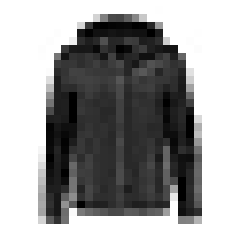

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[5]]

'Ankle boot'

In [17]:
X_valid.shape

(5000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

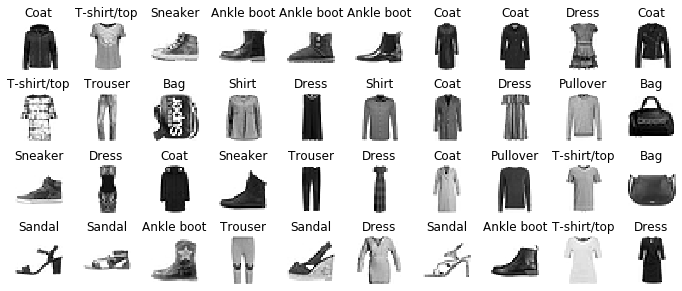

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [25]:
model.get_layer(hidden1.name) is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.01381036, -0.04039422, -0.05566452, ...,  0.04252457,
         0.02372958, -0.04849283],
       [ 0.03634997,  0.02735562,  0.00184834, ..., -0.02378589,
         0.01962303,  0.03299721],
       [-0.00766332, -0.06989788, -0.03299452, ..., -0.0227875 ,
         0.05224854, -0.02816576],
       ...,
       [ 0.06930991, -0.03360312, -0.00909331, ..., -0.01103589,
        -0.00360289, -0.02024505],
       [ 0.03000993, -0.06722827, -0.0470292 , ..., -0.07363925,
        -0.0740195 , -0.07024939],
       [-0.05596664,  0.01619567, -0.00849578, ...,  0.01097292,
        -0.01270665,  0.02794772]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.7189 - accuracy: 0.7641 - val_loss: 0.5180 - val_accuracy: 0.8272
Epoch 2/30
55000/55000 [==============================] - 6s 110us/sample - loss: 0.4910 - accuracy: 0.8301 - val_loss: 0.4612 - val_accuracy: 0.8340
Epoch 3/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4440 - accuracy: 0.8451 - val_loss: 0.4221 - val_accuracy: 0.8554
Epoch 4/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4167 - accuracy: 0.8545 - val_loss: 0.4016 - val_accuracy: 0.8624
Epoch 5/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3964 - accuracy: 0.8613 - val_loss: 0.4153 - val_accuracy: 0.8584
Epoch 6/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3811 - accuracy: 0.8665 - val_loss: 0.4008 - val_accuracy: 0.8606
Epoch 7/30
55000/55000 [===========================

In [33]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

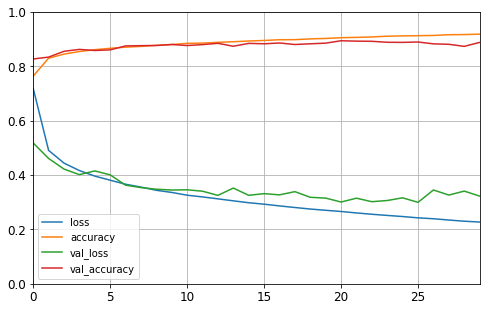

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.3530 - accuracy: 0.8761


[0.3529530727028847, 0.8761]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

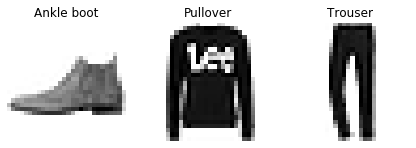

In [42]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) repeat with more layers
#### 5) apply on different datasets

## Q1)

In [43]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [47]:
#different  optimizer(adam)
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [45]:
history = model1.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 157us/sample - loss: 0.4876 - accuracy: 0.8241 - val_loss: 0.3798 - val_accuracy: 0.8608
Epoch 2/30
55000/55000 [==============================] - 7s 135us/sample - loss: 0.3684 - accuracy: 0.8644 - val_loss: 0.3896 - val_accuracy: 0.8496
Epoch 3/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.3298 - accuracy: 0.8781 - val_loss: 0.3213 - val_accuracy: 0.8850
Epoch 4/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3061 - accuracy: 0.8860 - val_loss: 0.3317 - val_accuracy: 0.8806
Epoch 5/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.2850 - accuracy: 0.8929 - val_loss: 0.3137 - val_accuracy: 0.8846
Epoch 6/30
55000/55000 [==============================] - 7s 136us/sample - loss: 0.2701 - accuracy: 0.8980 - val_loss: 0.3378 - val_accuracy: 0.8796
Epoch 7/30
55000/55000 [===========================

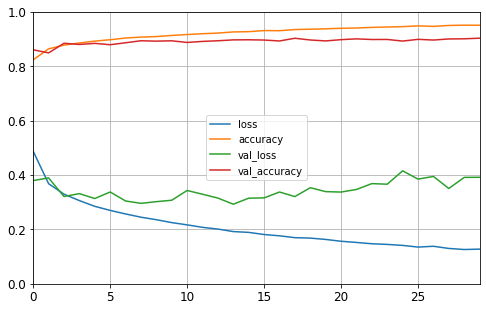

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Q2)

In [48]:
# different batch size
history2 = model.fit(X_train, y_train, batch_size=20, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 172us/sample - loss: 0.2388 - accuracy: 0.9140 - val_loss: 0.3066 - val_accuracy: 0.8894
Epoch 2/30
55000/55000 [==============================] - 9s 165us/sample - loss: 0.2325 - accuracy: 0.9157 - val_loss: 0.3087 - val_accuracy: 0.8894
Epoch 3/30
55000/55000 [==============================] - 9s 160us/sample - loss: 0.2280 - accuracy: 0.9180 - val_loss: 0.2966 - val_accuracy: 0.8946
Epoch 4/30
55000/55000 [==============================] - 9s 157us/sample - loss: 0.2217 - accuracy: 0.9205 - val_loss: 0.3076 - val_accuracy: 0.8894
Epoch 5/30
55000/55000 [==============================] - 9s 155us/sample - loss: 0.2172 - accuracy: 0.9216 - val_loss: 0.3184 - val_accuracy: 0.8862
Epoch 6/30
55000/55000 [==============================] - 9s 158us/sample - loss: 0.2130 - accuracy: 0.9232 - val_loss: 0.3004 - val_accuracy: 0.8956
Epoch 7/30
55000/55000 [===========================

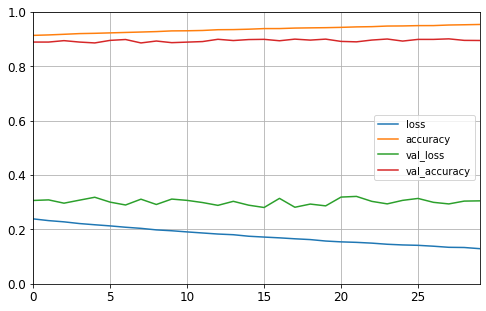

In [49]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Q3)

In [50]:
#different number of epochs
history3 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 13s 227us/sample - loss: 0.1100 - accuracy: 0.9611 - val_loss: 0.3028 - val_accuracy: 0.8994
Epoch 2/10
55000/55000 [==============================] - 10s 191us/sample - loss: 0.1073 - accuracy: 0.9634 - val_loss: 0.2998 - val_accuracy: 0.9002
Epoch 3/10
55000/55000 [==============================] - 12s 222us/sample - loss: 0.1046 - accuracy: 0.9644 - val_loss: 0.3227 - val_accuracy: 0.8932
Epoch 4/10
55000/55000 [==============================] - 11s 197us/sample - loss: 0.1032 - accuracy: 0.9638 - val_loss: 0.2954 - val_accuracy: 0.9018
Epoch 5/10
55000/55000 [==============================] - 9s 161us/sample - loss: 0.1007 - accuracy: 0.9652 - val_loss: 0.3051 - val_accuracy: 0.9022
Epoch 6/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.0990 - accuracy: 0.9665 - val_loss: 0.2970 - val_accuracy: 0.9022
Epoch 7/10
55000/55000 [=======================

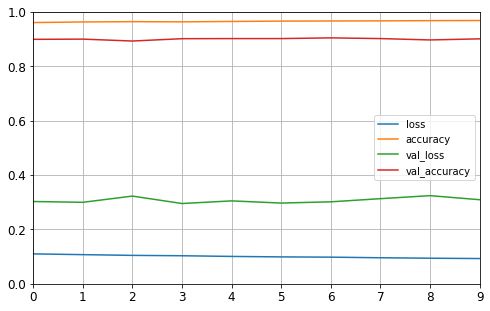

In [51]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Q4)

In [52]:
# more layers
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [53]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [54]:
history4 = model2.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 140us/sample - loss: 0.8020 - accuracy: 0.7287 - val_loss: 0.5479 - val_accuracy: 0.8062
Epoch 2/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.4946 - accuracy: 0.8232 - val_loss: 0.4603 - val_accuracy: 0.8382
Epoch 3/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4379 - accuracy: 0.8435 - val_loss: 0.4213 - val_accuracy: 0.8522
Epoch 4/30
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4054 - accuracy: 0.8558 - val_loss: 0.3976 - val_accuracy: 0.8634
Epoch 5/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3785 - accuracy: 0.8646 - val_loss: 0.3767 - val_accuracy: 0.8648
Epoch 6/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3589 - accuracy: 0.8706 - val_loss: 0.3526 - val_accuracy: 0.8730
Epoch 7/30
55000/55000 [===========================

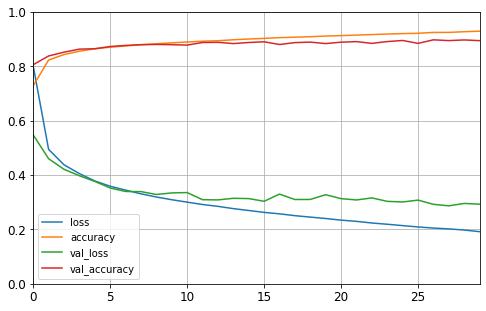

In [55]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Q5)

In [59]:
# different datasets
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [67]:
from sklearn import preprocessing
import pandas as pd
X=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [69]:
X = X.values
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [71]:
X_train.shape

(455, 30)

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[30]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [73]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [74]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_train, y_train))

Train on 455 samples, validate on 455 samples
Epoch 1/30
455/455 [==============================] - 1s 2ms/sample - loss: 2.2335 - accuracy: 0.0945 - val_loss: 2.0619 - val_accuracy: 0.3802
Epoch 2/30
455/455 [==============================] - 0s 147us/sample - loss: 1.9379 - accuracy: 0.6220 - val_loss: 1.7821 - val_accuracy: 0.7275
Epoch 3/30
455/455 [==============================] - 0s 152us/sample - loss: 1.6644 - accuracy: 0.7011 - val_loss: 1.5157 - val_accuracy: 0.6791
Epoch 4/30
455/455 [==============================] - 0s 152us/sample - loss: 1.4042 - accuracy: 0.6703 - val_loss: 1.2659 - val_accuracy: 0.6484
Epoch 5/30
455/455 [==============================] - 0s 156us/sample - loss: 1.1707 - accuracy: 0.6681 - val_loss: 1.0584 - val_accuracy: 0.6637
Epoch 6/30
455/455 [==============================] - 0s 149us/sample - loss: 0.9867 - accuracy: 0.7055 - val_loss: 0.9022 - val_accuracy: 0.7165
Epoch 7/30
455/455 [==============================] - 0s 151us/sample - loss: 0.

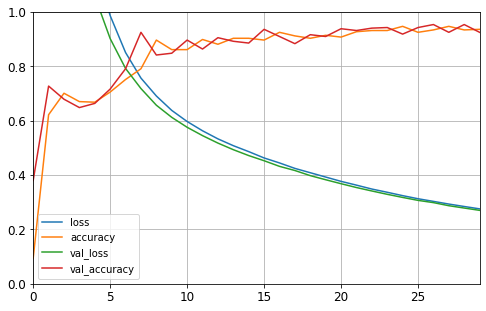

In [75]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [76]:
model.evaluate(X_test, y_test)

114/114 [==============================] - 0s 79us/sample - loss: 0.2825 - accuracy: 0.9561


[0.2825190153038293, 0.95614034]